# Leitura dos dados e criação das matrizes de conectividade

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_dir = r"C:\Users\biapr\Desktop\SME0880\ABIDE_pcp\cpac\filt_global\rois_dosenbach160"

In [3]:
# Lista de todos os arquivos .1d no diretório
file_paths = glob.glob(os.path.join(data_dir, '*.1d'))

In [4]:
def extract_patient_id(filename):
    # O ID do paciente sempre comeca com 005
    parts = filename.split('_')
    for part in parts:
        if part.startswith('005'):
            return part
    return None

In [5]:
# Arquivo CSV com os novos nomes das variáveis
variable_names_file = r'C:\Users\biapr\Desktop\SME0880\dos160_labels.csv'
variable_names = pd.read_csv(variable_names_file, header=None).iloc[:, 1].tolist()
variable_names[:10]  # Validacao da lista

['vmPFC',
 'aPFC',
 'aPFC',
 'mPFC',
 'aPFC',
 'vmPFC',
 'vmPFC',
 'aPFC',
 'vent aPFC',
 'vent aPFC']

In [6]:
# Dicionario para armazenar os dados de cada paciente
patient_data = {}

In [7]:
for file_path in file_paths:
    filename = os.path.basename(file_path)
    patient_id = extract_patient_id(filename)
    
    if patient_id:
        # leitura dos arquivos dos pacientes
        data = pd.read_csv(file_path, delim_whitespace=True)
        
        # Remocao da ultima coluna, que nao foi identificada
        data = data.iloc[:, :-1]
        
        # Renomendo as colunas com os nomes das variaveis
        if len(variable_names) == data.shape[1]:
            data.columns = variable_names
        else:
            raise ValueError(f"Number of variable names in CSV does not match number of columns in file {filename} after removing the last column")
        
        if patient_id not in patient_data:
            patient_data[patient_id] = []
        patient_data[patient_id].append(data)

In [8]:
# Combinacao dos dados dos pacientes em 1 df unico
for patient_id in patient_data:
    patient_data[patient_id] = pd.concat(patient_data[patient_id], axis=1)

In [9]:
# Validacao da leitura dos dados
patient_data.get('0051463')

,vmPFC,aPFC,aPFC,mPFC,aPFC,vmPFC,vmPFC,aPFC,vent aPFC,vent aPFC,...,inf cerebellum,post occipital,post occipital,post occipital,inf cerebellum,post occipital,post occipital,post occipital,post occipital,post occipital
0,-13.559782,33.153904,-4.735303,-8.146840,-13.440529,-7.556193,0.053685,7.022659,-8.998912,-5.096544,...,-3.551649,-5.341147,-10.296898,-4.855639,-4.946054,-6.857371,-16.014973,1.480928,-0.576554,-0.714171
1,-20.480299,82.741226,12.081065,-21.831291,0.783501,-6.057616,-7.192935,18.138255,-10.715783,11.094924,...,-6.952463,-15.199758,-15.376837,-13.488661,-7.043623,-11.684257,-23.949593,-21.437476,-11.363196,-0.313344
2,-17.208295,111.408326,20.908001,-27.290521,34.514356,-1.701191,-14.261131,35.627187,-6.056232,24.340236,...,-8.350126,-22.248679,-19.251590,-22.413660,0.076866,-16.121337,-22.308586,-38.506368,-18.797849,-5.828104
3,-8.454685,103.978879,15.599113,-30.029942,62.458487,-5.059740,-15.617229,38.793597,-0.167904,23.027652,...,-5.662174,-18.490210,-19.973641,-24.110785,10.553738,-18.446226,-17.160930,-24.341954,-14.142818,-13.424530
4,-3.244981,68.740045,6.257740,-36.732200,55.818024,-16.489990,-10.915861,11.801516,1.446547,8.457437,...,-0.062011,-5.285080,-13.000068,-16.368133,10.862399,-17.171554,-14.228111,12.900139,-3.176186,-13.590563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,31.307596,-11.581337,16.551379,26.188790,17.685917,17.219228,6.625815,-18.067760,17.532997,13.039963,...,5.993736,4.051546,13.249141,-17.664430,5.424194,-6.415618,-10.011425,13.788330,-3.619325,18.762848
142,22.152009,-40.491971,-1.744913,-22.833877,-69.898164,8.159334,3.163550,-51.582688,1.346493,22.628587,...,9.010229,18.423016,9.253518,-16.915808,-7.526204,11.538074,-7.696687,8.560964,-1.246354,8.641314
143,5.303550,-60.143699,-9.999628,-46.018966,-117.846626,-11.625748,-3.858481,-63.405261,-7.206102,25.791662,...,12.148944,25.903578,4.098504,-16.371101,-13.810173,19.493632,-1.806395,7.530805,-5.599764,7.747234
144,-10.690644,-50.300937,-10.726527,-27.257808,-97.448201,-30.391463,-9.636990,-47.118248,-6.461301,26.278526,...,10.458100,20.748210,1.049776,-17.904518,-9.612631,11.343414,-2.352844,8.172918,-10.083209,7.294391


In [10]:
def calculate_spearman_correlation(data):
    return data.corr(method='spearman')

patient_correlations = {patient_id: calculate_spearman_correlation(data) for patient_id, data in patient_data.items()}

In [11]:
patient_correlations.get('0051463')

,vmPFC,aPFC,aPFC,mPFC,aPFC,vmPFC,vmPFC,aPFC,vent aPFC,vent aPFC,...,inf cerebellum,post occipital,post occipital,post occipital,inf cerebellum,post occipital,post occipital,post occipital,post occipital,post occipital
vmPFC,1.000000,-0.368830,-0.119439,0.339539,-0.025849,0.308926,0.068077,-0.026906,-0.036931,-0.197185,...,0.082710,0.150322,-0.067861,-0.207392,-0.059778,-0.068586,0.003110,0.301723,-0.021970,0.206401
aPFC,-0.368830,1.000000,-0.082078,-0.230440,0.336150,0.050890,-0.234693,0.308004,0.296702,0.220005,...,-0.319862,-0.197686,-0.065543,0.021800,0.025413,0.027176,0.026161,-0.201292,-0.287282,-0.135241
aPFC,-0.119439,-0.082078,1.000000,-0.394704,0.113015,-0.155463,0.004957,-0.368702,-0.009954,0.135195,...,0.009958,0.004367,-0.015337,-0.203058,0.162589,-0.323590,0.001583,0.332772,0.161008,0.403781
mPFC,0.339539,-0.230440,-0.394704,1.000000,-0.036307,0.336909,0.003052,0.284621,-0.129797,-0.366057,...,-0.005697,-0.080613,0.232240,-0.039519,-0.016035,-0.059331,0.031409,-0.160923,0.022533,-0.126276
aPFC,-0.025849,0.336150,0.113015,-0.036307,1.000000,0.312323,0.077231,0.368205,0.242906,0.167031,...,-0.236633,-0.270558,-0.142090,-0.059215,0.272613,-0.211395,-0.028294,0.088236,0.056829,0.178410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
post occipital,-0.068586,0.027176,-0.323590,-0.059331,-0.211395,-0.194293,-0.151256,0.144589,0.022826,-0.151132,...,0.255215,0.130741,0.220908,0.508457,0.091572,1.000000,0.526180,-0.367171,-0.077061,-0.358534
post occipital,0.003110,0.026161,0.001583,0.031409,-0.028294,-0.097583,-0.285543,0.254104,-0.113216,-0.409615,...,0.293498,0.044940,0.585536,0.477651,0.328403,0.526180,1.000000,-0.281108,0.051835,-0.300570
post occipital,0.301723,-0.201292,0.332772,-0.160923,0.088236,0.054461,0.409064,-0.459208,0.153419,0.346098,...,-0.105569,0.194991,-0.373808,-0.369898,0.080462,-0.367171,-0.281108,1.000000,0.382619,0.472854
post occipital,-0.021970,-0.287282,0.161008,0.022533,0.056829,0.123774,0.196826,-0.175753,-0.188031,-0.031232,...,0.017350,0.151044,-0.039534,0.169653,0.335918,-0.077061,0.051835,0.382619,1.000000,-0.066249


<Axes: >

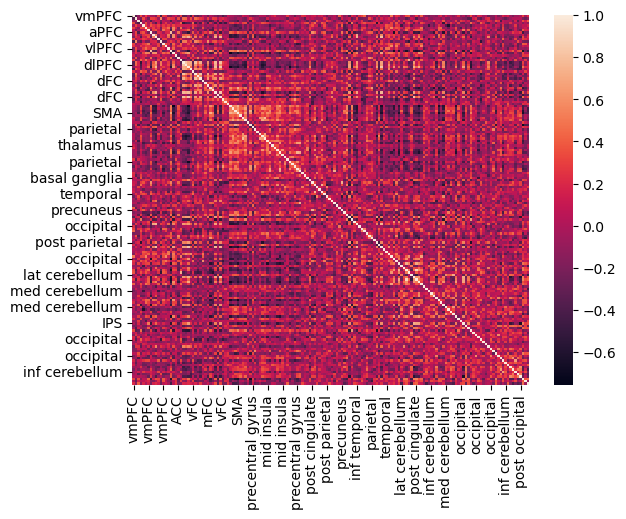

In [12]:
# Correlacao dos dados de paciente diagnosticado com ASD
sns.heatmap(patient_correlations.get('0051463'))

<Axes: >

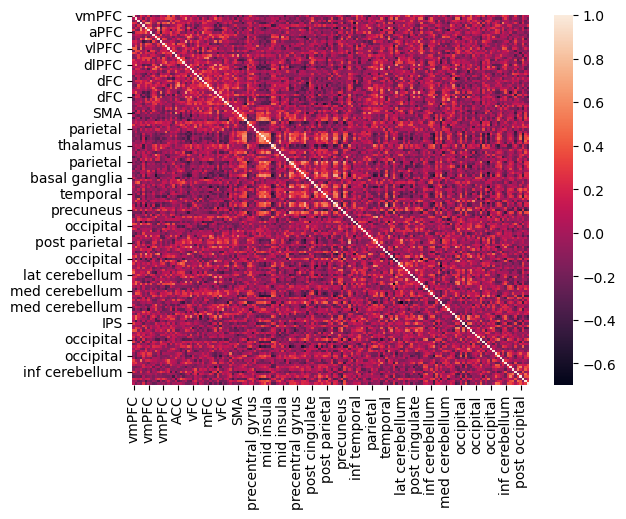

In [13]:
# Correlacao dos dados de paciente TD
sns.heatmap(patient_correlations.get('0050030'))

In [14]:
def flatten_matrix(matrix):
    # Elementos da matriz triangular superior, excluindo a diagonal
    upper_tri_indices = np.triu_indices_from(matrix, k=1)
    flattened = matrix.values[upper_tri_indices]
    
    # Nomes das variáveis correspondentes para os indices
    column_names = matrix.columns
    var_pairs = [(column_names[i], column_names[j]) for i, j in zip(*upper_tri_indices)]
    
    # DataFrame com os pares de variáveis como cabeçalhos
    flattened_df = pd.DataFrame([flattened], columns=var_pairs)
    
    return flattened_df

flattened_vectors = {patient_id: flatten_matrix(correlation) for patient_id, correlation in patient_correlations.items()}

In [15]:
flattened_vectors.get('0051463')

,"(vmPFC, aPFC)","(vmPFC, aPFC)","(vmPFC, mPFC)","(vmPFC, aPFC)","(vmPFC, vmPFC)","(vmPFC, vmPFC)","(vmPFC, aPFC)","(vmPFC, vent aPFC)","(vmPFC, vent aPFC)","(vmPFC, vmPFC)",...,"(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)"
0,-0.36883,-0.119439,0.339539,-0.025849,0.308926,0.068077,-0.026906,-0.036931,-0.197185,0.30532,...,0.52618,-0.367171,-0.077061,-0.358534,-0.281108,0.051835,-0.30057,0.382619,0.472854,-0.066249


In [16]:
# Combine todos os DataFrames em um único DataFrame
all_vectors = pd.concat(flattened_vectors, axis=0)

# Renomeie a coluna 'index' para 'patient_id' para manter claro que é o ID do paciente
all_vectors.index.name = 'patient_id'
all_vectors.reset_index(inplace=True)

# Salve o resultado em um arquivo CSV, se necessário
all_vectors.to_csv('patient_correlations.csv', index=False)

In [17]:
all_vectors.head()

,level_0,level_1,"(vmPFC, aPFC)","(vmPFC, aPFC)","(vmPFC, mPFC)","(vmPFC, aPFC)","(vmPFC, vmPFC)","(vmPFC, vmPFC)","(vmPFC, aPFC)","(vmPFC, vent aPFC)",...,"(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)"
0,0051461,0,0.175695,0.072106,0.081816,0.206274,0.102997,0.319958,0.161952,0.364796,...,0.269976,0.335922,0.215270,0.087338,0.045692,0.052163,-0.220931,0.311907,0.164347,0.276658
1,0051463,0,-0.368830,-0.119439,0.339539,-0.025849,0.308926,0.068077,-0.026906,-0.036931,...,0.526180,-0.367171,-0.077061,-0.358534,-0.281108,0.051835,-0.300570,0.382619,0.472854,-0.066249
2,0051464,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.309867,0.397052,0.657301,0.333119,0.306018,0.408782,0.191740,0.361156,0.372331,0.370931
3,0051465,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.327539,0.229935,0.421588,0.258974,0.409642,0.730639,0.417771,0.488363,-0.048931,0.272513
4,0051473,0,-0.119987,0.080547,0.006978,-0.287386,0.468913,0.087592,-0.009376,-0.149551,...,0.346862,0.268082,0.085097,0.106637,0.439804,0.272471,0.154591,0.487218,0.285554,0.316727


<Axes: >

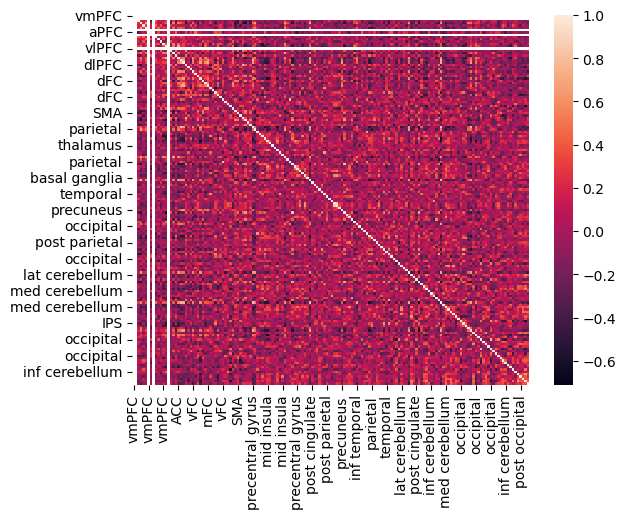

In [18]:
sns.heatmap(patient_correlations.get('0051464'))

In [23]:
all_vectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Columns: 12722 entries, level_0 to ('post occipital', 'post occipital')
dtypes: float64(12720), int64(1), object(1)
memory usage: 84.5+ MB


## Adição da label de diagnóstico

In [41]:
pheno_path = "C:/Users/biapr/Desktop/SME0880/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv"
pheno = pd.read_csv(pheno_path)
pheno.head()

,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1


In [43]:
pheno = pheno[['SUB_ID','DX_GROUP']]

In [44]:
pheno.rename(columns={'SUB_ID': 'level_0', 'DX_GROUP': 'diag'}, inplace=True)

In [45]:
pheno.head()

,level_0,diag
0,50002,1
1,50003,1
2,50004,1
3,50005,1
4,50006,1


In [46]:
pheno['level_0'] = pheno['level_0'].astype(str).str.zfill(7)
pheno.head()

,level_0,diag
0,0050002,1
1,0050003,1
2,0050004,1
3,0050005,1
4,0050006,1


In [47]:
all_vectors = all_vectors.merge(pheno, on='level_0', how='left')
all_vectors.head()

,level_0,level_1,"(vmPFC, aPFC)","(vmPFC, aPFC)","(vmPFC, mPFC)","(vmPFC, aPFC)","(vmPFC, vmPFC)","(vmPFC, vmPFC)","(vmPFC, aPFC)","(vmPFC, vent aPFC)",...,"(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)","(post occipital, post occipital)",diag
0,0051461,0,0.175695,0.072106,0.081816,0.206274,0.102997,0.319958,0.161952,0.364796,...,0.335922,0.215270,0.087338,0.045692,0.052163,-0.220931,0.311907,0.164347,0.276658,1
1,0051463,0,-0.368830,-0.119439,0.339539,-0.025849,0.308926,0.068077,-0.026906,-0.036931,...,-0.367171,-0.077061,-0.358534,-0.281108,0.051835,-0.300570,0.382619,0.472854,-0.066249,1
2,0051464,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.397052,0.657301,0.333119,0.306018,0.408782,0.191740,0.361156,0.372331,0.370931,1
3,0051465,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229935,0.421588,0.258974,0.409642,0.730639,0.417771,0.488363,-0.048931,0.272513,1
4,0051473,0,-0.119987,0.080547,0.006978,-0.287386,0.468913,0.087592,-0.009376,-0.149551,...,0.268082,0.085097,0.106637,0.439804,0.272471,0.154591,0.487218,0.285554,0.316727,1


In [48]:
all_vectors.to_csv('patient_correlations_with_classification.csv', index=False)